# Week 15
## Joining Tables with `pandas`

[merge() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

Reference 1: [Joining Tables in pandas](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/)

Reference 2: [Visual Representation of Joining Tables](https://www.postgresqltutorial.com/postgresql-joins/)

### Learning Objectives
1. Read and understand an entity relationship diagram (ERD)
>- Identify the tables and fields in a database
>- Identify keys (primary/foreign) keys that join tables together
2. Perform exploratory data analysis (EDA), <a id='Section 1'></a>[Section 1: EDA](#Section-1)
3. Join tables to extract data from multiple sources: <a id='Section 2'></a>[Section 2: Joins](#Section-2)

### A Database Model to Practice Joins 

We will use a fictional company's data model, `SaleCo`, to practice joining tables. The entity relationship model is shown below that helps illustrate the business rules listed here:
1. A customer may generate many invoices. Each invoice is generated by one customer
2. An invoice contains one or more invoice lines. Each invoice is generated by one customer.
3. Each invoice line references one product. A product may be found in many invoice lines (i.e, you can sell more than one hammer to more than one customer)
>- Within the invoice table, `line_units` gives us the quantity sold for each product and `line_price` gives us the unit cost. 
4. A vendor may supply  many products. Some vendors do not yet supply products. For example, a vendor list may include potential vendors. 
5. If a product is vendor-supplied, it is supplied by only a single vendor
6. Some products are not supplied by a vendor. For example, some products may be produced in-house or bought on the open market. 

#### Data needed for this tutorial
>- Download the following files from Canvas (or other source) and save in your working director for this notebook
>>- customer.csv
>>- invoice.csv
>>- line.csv
>>- product.csv
>>- vendor.csv

## Entity Relationship Diagram (ERD) of the SaleCo Database

### Examine the ERD to show you how tables are related
#### Note: You may need the `SaleCoERD.png` file saved in the same working direction as this notebook in order to see the image
>- customer and invoice can be joined on `CUS_CODE`
>- invoice and line can be joined on `INV_NUMBER`
>- line and product can be joined on `P_CODE`
>- product and vendor and be joined on `V_CODE`

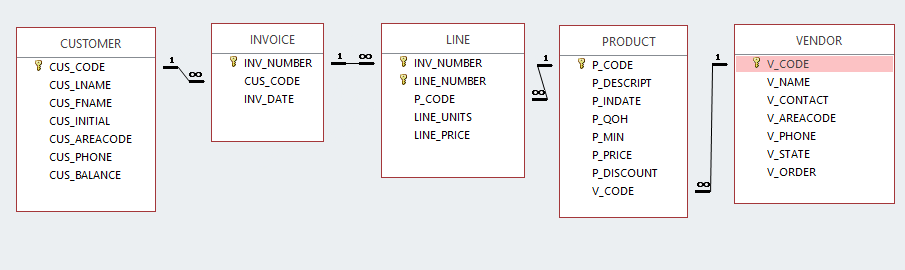

In [26]:
import pandas as pd
import numpy as np

### Create the `cust` dataframe from the customer.csv file

In [27]:
cust=pd.read_csv('customer.csv')
cust
#customers was aliased and read in.

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE
0,10010,Ramas,Alfred,A,615,844-2573,0.00
1,10011,Dunne,Leona,K,713,894-1238,0.00
2,10012,Smith,Kathy,W,615,894-2285,345.86
3,10013,Olowski,Paul,F,615,894-2180,536.75
4,10014,Orlando,Myron,NaN,615,222-1672,0.00
5,10015,O'Brian,Amy,B,713,442-3381,0.00
6,10016,Brown,James,G,615,297-1228,221.19
7,10017,Williams,George,NaN,615,290-2556,768.93
8,10018,Farriss,Anne,G,713,382-7185,216.55
9,10019,Smith,Olette,K,615,297-3809,0.00


### Create the `inv` dataframe from the invoice.csv file

In [28]:
inv=pd.read_csv('invoice.csv')
inv

,INV_NUMBER,CUS_CODE,INV_DATE
0,1001,10014,16-Jan-18
1,1002,10011,16-Jan-18
2,1003,10012,16-Jan-18
3,1004,10011,17-Jan-18
4,1005,10018,17-Jan-18
5,1006,10014,17-Jan-18
6,1007,10015,17-Jan-18
7,1008,10011,17-Jan-18


### Create the `line` dataframe from the line.csv file

In [29]:
line=pd.read_csv('line.csv')
line

,INV_NUMBER,LINE_NUMBER,P_CODE,LINE_UNITS,LINE_PRICE
0,1001,1,13-Q2/P2,1,14.99
1,1001,2,23109-HB,1,9.95
2,1002,1,54778-2T,2,4.99
3,1003,1,2238/QPD,1,38.95
4,1003,2,1546-QQ2,1,39.95
5,1003,3,13-Q2/P2,5,14.99
6,1004,1,54778-2T,3,4.99
7,1004,2,23109-HB,2,9.95
8,1005,1,PVC23DRT,12,5.87
9,1006,1,SM-18277,3,6.99


### Create the `prod` dataframe from the product.csv file

In [30]:
prod=pd.read_csv('product.csv')
prod

,P_CODE,P_DESCRIPT,P_INDATE,P_QOH,P_MIN,P_PRICE,P_DISCOUNT,V_CODE
0,11QER/31,"Power painter, 15 psi., 3-nozzle",03-Nov-17,8,5,109.99,0.00,25595.0
1,13-Q2/P2,7.25-in. pwr. saw blade,13-Dec-17,32,15,14.99,0.05,21344.0
2,14-Q1/L3,9.00-in. pwr. saw blade,13-Nov-17,18,12,17.49,0.00,21344.0
3,1546-QQ2,"Hrd. cloth, 1/4-in., 2x50",15-Jan-18,15,8,39.95,0.00,23119.0
4,1558-QW1,"Hrd. cloth, 1/2-in., 3x50",15-Jan-18,23,5,43.99,0.00,23119.0
5,2232/QTY,"B&D jigsaw, 12-in. blade",30-Dec-17,8,5,109.92,0.05,24288.0
6,2232/QWE,"B&D jigsaw, 8-in. blade",24-Dec-17,6,5,99.87,0.05,24288.0
7,2238/QPD,"B&D cordless drill, 1/2-in.",20-Jan-18,12,5,38.95,0.05,25595.0
8,23109-HB,Claw hammer,20-Jan-18,23,10,9.95,0.10,21225.0
9,23114-AA,"Sledge hammer, 12 lb.",02-Jan-18,8,5,14.40,0.05,NaN


### Create the `vend` dataframe from the vendor.csv file

In [31]:
vend=pd.read_csv('vendor.csv')
vend

,V_CODE,V_NAME,V_CONTACT,V_AREACODE,V_PHONE,V_STATE,V_ORDER
0,21225,"Bryson, Inc.",Smithson,615,223-3234,TN,Y
1,21226,"SuperLoo, Inc.",Flushing,904,215-8995,FL,N
2,21231,D&E Supply,Singh,615,228-3245,TN,Y
3,21344,Gomez Bros.,Ortega,615,889-2546,KY,N
4,22567,Dome Supply,Smith,901,678-1419,GA,N
5,23119,Randsets Ltd.,Anderson,901,678-3998,GA,Y
6,24004,Brackman Bros.,Browning,615,228-1410,TN,N
7,24288,"ORDVA, Inc.",Hakford,615,898-1234,TN,Y
8,25443,"B&K, Inc.",Smith,904,227-0093,FL,N
9,25501,Damal Supplies,Smythe,615,890-3529,TN,N


# Section 1
## Getting Familiar with the SaleCo database

>- The questions in this section are mostly to help you get familiar with the data in the `SaleCo` database. You shouldn't need to join tables in this section and practice selecting and aggregating data. 

# Q1: What are the unique values for all of the columns in the `line` table? 
>- From this you should be answer questions such as:
>>- How many total invoices were there?
>>- How many total products were sold? (remember products could show up more than once)
>>- How many distinct prices of products are there?

In [32]:
for column in line:
    print(line[column].unique())
    #unique for each column

[1001 1002 1003 1004 1005 1006 1007 1008]
[1 2 3 4]
['13-Q2/P2' '23109-HB' '54778-2T' '2238/QPD' '1546-QQ2' 'PVC23DRT'
 'SM-18277' '2232/QTY' '89-WRE-Q' 'WR3/TT3']
[ 1  2  5  3 12]
[ 14.99   9.95   4.99  38.95  39.95   5.87   6.99 109.92 256.99 119.95]


# Q2: What is the overall number of units sold?
>- Also show the total number of distinct products sold in the output

In [33]:
line['LINE_UNITS'].sum()
#line dataframe line units sum total

46

In [34]:
line['P_CODE'].unique().size
#line dataframe distinct products total

10

# Q3: What is the average units sold per invoice line?

In [35]:
line['LINE_UNITS'].mean()
#Per invoice line average units

2.5555555555555554

# Q4: What is the average units sold per product?
>- Remember that products can occur on multiple lines in the line table so think through how to calculate this average correctly. 

In [36]:
line.groupby('P_CODE')['LINE_UNITS'].mean()
#line dataframe was grouped by product code and line units.Its mean was given.

P_CODE
13-Q2/P2    2.666667
1546-QQ2    1.000000
2232/QTY    1.000000
2238/QPD    1.000000
23109-HB    1.250000
54778-2T    2.000000
89-WRE-Q    1.000000
PVC23DRT    8.500000
SM-18277    3.000000
WR3/TT3     3.000000
Name: LINE_UNITS, dtype: float64

# Q5: What is the total inventory on hand for all our products?
>- Inventory can be found in the `product` table and the `P_QOH` filed which stands for Product Quantity on Hand
>- Also show the total number of unique products in this table

In [37]:
prod['P_QOH'].sum() 
#The product tables P_QOH was summed.

822

In [38]:
prod['P_CODE'].unique().size
#In the products dataframe product codes unique values were summed.

16

# Q6: What is the average product inventory?

In [39]:
prod.groupby('P_CODE')['P_QOH'].mean()
#products was grouped by product code and P_QOH and the average was found.

P_CODE
11QER/31      8
13-Q2/P2     32
14-Q1/L3     18
1546-QQ2     15
1558-QW1     23
2232/QTY      8
2232/QWE      6
2238/QPD     12
23109-HB     23
23114-AA      8
54778-2T     43
89-WRE-Q     11
PVC23DRT    188
SM-18277    172
SW-23116    237
WR3/TT3      18
Name: P_QOH, dtype: int64

# Q7: What is the value of our inventory?
>- Examine the product table to help you answer this
>- Create a new feature in the `prod` dataframe named, `TOTVAL` that stores each's products inventory value
>- Then calculate and show the total value across all products

In [40]:
prod['TOTVAL']=prod['P_QOH']*prod['P_PRICE']*(1-prod['P_DISCOUNT'])
prod[['P_CODE','TOTVAL']]
#prod TOTVAL was created using P_QOH,P_PRICE and minusing P_DISCOUNT.
#prod P_CODE and TOTVAL were read in.

,P_CODE,TOTVAL
0,11QER/31,879.9200
1,13-Q2/P2,455.6960
2,14-Q1/L3,314.8200
3,1546-QQ2,599.2500
4,1558-QW1,1011.7700
5,2232/QTY,835.3920
6,2232/QWE,569.2590
7,2238/QPD,444.0300
8,23109-HB,205.9650
9,23114-AA,109.4400


# Q8: Write your own questions and continue examining the SaleCo dabase

>- Continue to explore the tables in this section as well as the others using exploratory data analysis methods we have discussed in class
>- Make sure you have a good understanding of the data that is stored in each field

In [41]:
#What is the total customer balance?

cust['CUS_BALANCE'].sum()

2089.28

In [42]:
cust['CUS_BALANCE']
#Without sum

0      0.00
1      0.00
2    345.86
3    536.75
4      0.00
5      0.00
6    221.19
7    768.93
8    216.55
9      0.00
Name: CUS_BALANCE, dtype: float64

# Section 2
## Joining tables using `pandas`

# Q9: 
## What is all the customer information for any of our customers that have an invoice? 
>- Show all the customer info (name, areacode, etc)
>- Remember, just because we have customer information doesn't mean they have created an invoice (i.e., placed an order) yet. 

In [43]:
customers=inv.merge(cust,on='CUS_CODE')['CUS_CODE'].unique()
for column in customers:
    print(cust.loc[cust['CUS_CODE']==column])
#merged on CUS_CODE
#for loop for column in customers table

   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
4     10014   Orlando     Myron         NaN           615  222-1672   

   CUS_BALANCE  
4          0.0  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
1     10011     Dunne     Leona           K           713  894-1238   

   CUS_BALANCE  
1          0.0  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
2     10012     Smith     Kathy           W           615  894-2285   

   CUS_BALANCE  
2       345.86  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
8     10018   Farriss      Anne           G           713  382-7185   

   CUS_BALANCE  
8       216.55  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
5     10015   O'Brian       Amy           B           713  442-3381   

   CUS_BALANCE  
5          0.0  


# Q10: 
## Who are all our customers with or without an order (i.e., invoice)?
>- Note the difference in how this question is asked versus Q9
>- A common follow-up question is: Which customers do we have information on that haven't placed an order?
>>- This could indicate a lead list for our sales team to contact

In [44]:
cust
#All customers with an order no filtering

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE
0,10010,Ramas,Alfred,A,615,844-2573,0.00
1,10011,Dunne,Leona,K,713,894-1238,0.00
2,10012,Smith,Kathy,W,615,894-2285,345.86
3,10013,Olowski,Paul,F,615,894-2180,536.75
4,10014,Orlando,Myron,NaN,615,222-1672,0.00
5,10015,O'Brian,Amy,B,713,442-3381,0.00
6,10016,Brown,James,G,615,297-1228,221.19
7,10017,Williams,George,NaN,615,290-2556,768.93
8,10018,Farriss,Anne,G,713,382-7185,216.55
9,10019,Smith,Olette,K,615,297-3809,0.00


##### Follow-up: Which customers do we have info on but haven't placed an order?
>- Only show these customers in your output

In [45]:
customers=pd.merge(inv,cust,on='CUS_CODE',how='outer',indicator=True)
customers=customers[customers['_merge']=="right_only"]['CUS_CODE']
for column in customers:
    print(cust.loc[cust['CUS_CODE']==column])
    #merge on CUS_CODE

   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
0     10010     Ramas    Alfred           A           615  844-2573   

   CUS_BALANCE  
0          0.0  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
3     10013   Olowski      Paul           F           615  894-2180   

   CUS_BALANCE  
3       536.75  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
6     10016     Brown     James           G           615  297-1228   

   CUS_BALANCE  
6       221.19  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
7     10017  Williams    George         NaN           615  290-2556   

   CUS_BALANCE  
7       768.93  
   CUS_CODE CUS_LNAME CUS_FNAME CUS_INITIAL  CUS_AREACODE CUS_PHONE  \
9     10019     Smith    Olette           K           615  297-3809   

   CUS_BALANCE  
9          0.0  


##### Show how many customers we have info on that don't have orders
>- Just show the count in your output

In [46]:
customers.size
#used size on the dataframe of the customers who we have info on that dont have orders.

5

# Q11: Which of our products have vendor information?
>- Remember, not all of our products come from vendors. For example, we could produce some products in-house. 

In [47]:
prod.dropna(subset=['V_CODE'])
#dropna to get rid of the subset V_CODE

,P_CODE,P_DESCRIPT,P_INDATE,P_QOH,P_MIN,P_PRICE,P_DISCOUNT,V_CODE,TOTVAL
0,11QER/31,"Power painter, 15 psi., 3-nozzle",03-Nov-17,8,5,109.99,0.00,25595.0,879.9200
1,13-Q2/P2,7.25-in. pwr. saw blade,13-Dec-17,32,15,14.99,0.05,21344.0,455.6960
2,14-Q1/L3,9.00-in. pwr. saw blade,13-Nov-17,18,12,17.49,0.00,21344.0,314.8200
3,1546-QQ2,"Hrd. cloth, 1/4-in., 2x50",15-Jan-18,15,8,39.95,0.00,23119.0,599.2500
4,1558-QW1,"Hrd. cloth, 1/2-in., 3x50",15-Jan-18,23,5,43.99,0.00,23119.0,1011.7700
5,2232/QTY,"B&D jigsaw, 12-in. blade",30-Dec-17,8,5,109.92,0.05,24288.0,835.3920
6,2232/QWE,"B&D jigsaw, 8-in. blade",24-Dec-17,6,5,99.87,0.05,24288.0,569.2590
7,2238/QPD,"B&D cordless drill, 1/2-in.",20-Jan-18,12,5,38.95,0.05,25595.0,444.0300
8,23109-HB,Claw hammer,20-Jan-18,23,10,9.95,0.10,21225.0,205.9650
10,54778-2T,"Rat-tail file, 1/8-in. fine",15-Dec-17,43,20,4.99,0.00,21344.0,214.5700


##### Q11 Follow-up. Show the number of products we have vendor info on.

In [48]:
prod.dropna(subset=['V_CODE']).size

126

# Q12: Which products do we produce in-house?
>- In other words, which products do we not have vendor info on?

In [49]:
customers=pd.merge(vend,prod,on='V_CODE',how='outer',indicator=True)
customers=customers[customers['_merge']=="right_only"]['P_CODE']
for column in customers:
    print(prod.loc[prod['P_CODE']==column])
    #merge on V_CODE,P_CODE

     P_CODE             P_DESCRIPT   P_INDATE  P_QOH  P_MIN  P_PRICE  \
9  23114-AA  Sledge hammer, 12 lb.  02-Jan-18      8      5     14.4   

   P_DISCOUNT  V_CODE  TOTVAL  
9        0.05     NaN  109.44  
      P_CODE               P_DESCRIPT   P_INDATE  P_QOH  P_MIN  P_PRICE  \
12  PVC23DRT  PVC pipe, 3.5-in., 8-ft  20-Feb-18    188     75     5.87   

    P_DISCOUNT  V_CODE   TOTVAL  
12         0.0     NaN  1103.56  


##### Q12 follow up: What is the total inventory of the products we produce in-house?

In [50]:
customers.size

2